In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mpg = sns.load_dataset("mpg")

In [5]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### The relationship between horsepower and fuel economy.

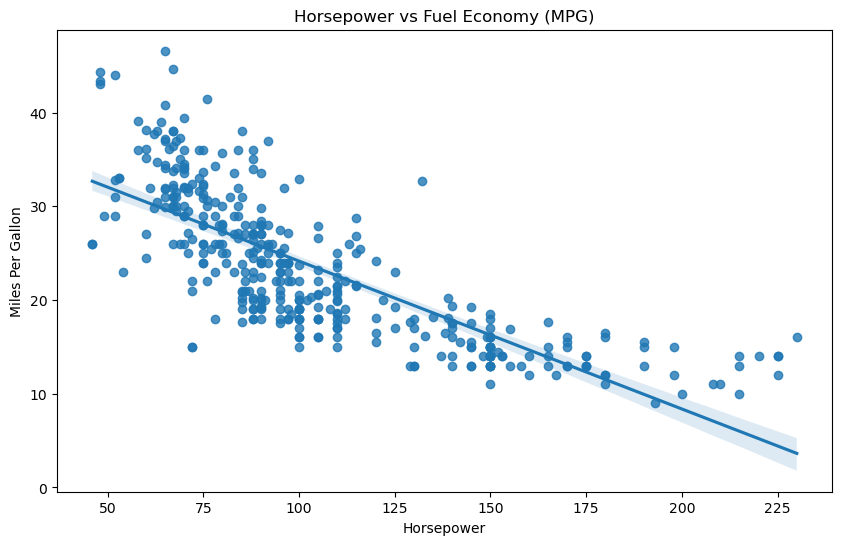

In [104]:
plt.figure(figsize=(10,6))
sns.regplot(data=mpg,x='horsepower',y='mpg')
plt.title('Horsepower vs Fuel Economy (MPG)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

### A table summarizing fuel economy by country of origin

In [92]:
mpg_summary = mpg.groupby('origin')['mpg'].agg(
    average_mpg = 'mean',
    min_mpg = 'min', 
    max_mpg = 'max'
).reset_index().sort_values(by='average_mpg',ascending=False)

mpg_summary['mpg_range'] = mpg_summary['min_mpg'].astype(str) + '-' + mpg_summary['max_mpg'].astype(str)

mpg_summary = mpg_summary[['origin','average_mpg','mpg_range']] 

mpg_summary.style.set_properties(**{
    'font-size': '12pt',
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '12pt')]
}])

,origin,average_mpg,mpg_range
1,japan,30.450633,18.0-46.6
0,europe,27.891429,16.2-44.3
2,usa,20.083534,9.0-39.0


### A visual showing how fuel economy has changed over time

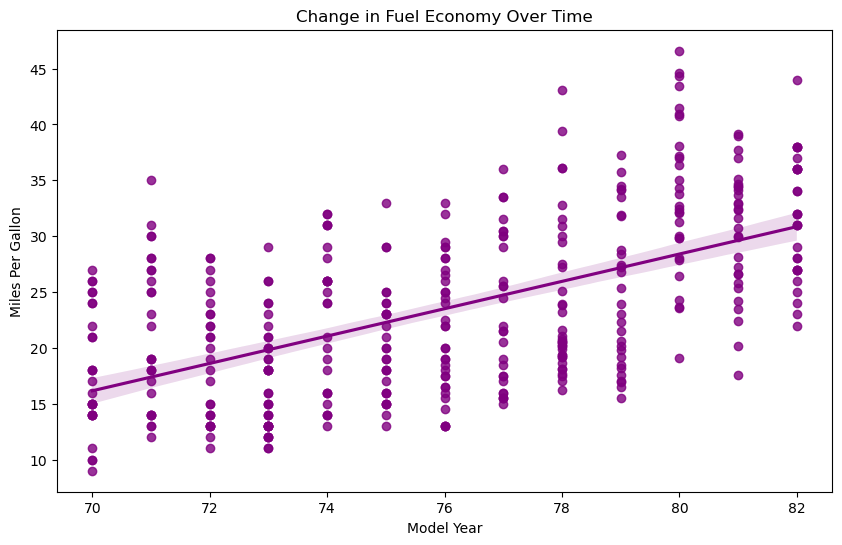

In [102]:
plt.figure(figsize=(10,6))
sns.regplot(data=mpg,x='model_year',y='mpg',scatter_kws = {"color" : "Purple"},line_kws={"color" : "Purple"})
plt.title('Change in Fuel Economy Over Time')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon')
plt.show()

### A) Change in Fuel Economy Over Time by Origin

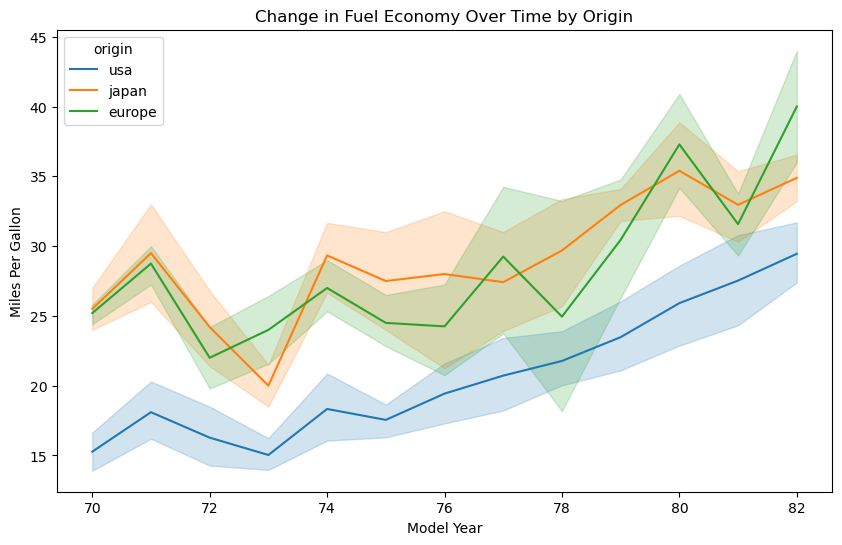

In [106]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mpg,x='model_year',y='mpg',hue = 'origin')
plt.title('Change in Fuel Economy Over Time by Origin')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon')
plt.show()

### B) Relationship between Number of Cylinders on Fuel Economy Including Origin

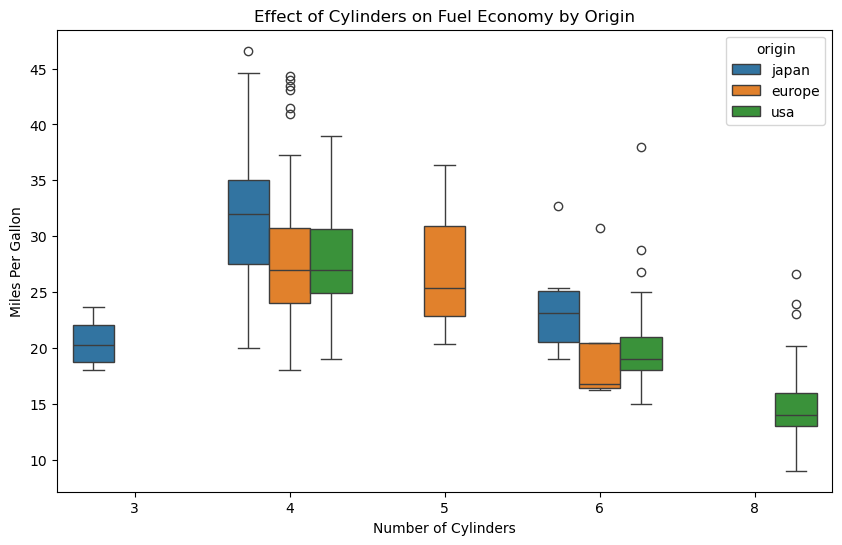

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(data=mpg,x='cylinders',y='mpg', hue='origin')
plt.title('Effect of Cylinders on Fuel Economy by Origin')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon')
plt.show()

## Observations

#### Chart 1 shows that cars with more horsepower are generally less fuel efficient.
#### Japanese cars are generally more fuel efficient, followed by European, and then American cars.
#### Over time, cars have generally become more fuel-efficient. Throughout the years, Japanese and European vehicles consistently outperformed American cars in fuel economy. While Japanese cars led in fuel efficiency in the early 1970s, European models eventually surpassed them by 1982. 
#### As shown in the "Effect of Cylinders on Fuel Economy by Origin" chart, vehicles with 4 cylinders generally demonstrate higher fuel efficiency. Additionally, 8-cylinder cars appear to be exclusively produced by American manufacturers, while 3-cylinder models are unique to Japanese manufacturers, and 5-cylinder vehicles are solely produced by European manufacturers.
#### The "Effect of Cylinders on Fuel Economy by Origin" chart also indicates that, despite the absence of 5-cylinder models, 3-cylinder vehicles do not exhibit significantly greater fuel efficiency compared to 8-cylinder models.